# Naive bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=["CustomerID"])

In [2]:
df.head()

,Imax,E,PIL,Mb,MeanD,EDate,class
0,12,4.335643,2.567,156.860294,0.000000,0.000000,2
1,32,6.503112,2.567,356.232222,35.000000,2.226424,2
2,360,6.504979,2.752,442.969333,24.266667,2.235084,2
3,80,4.494680,2.567,189.650000,55.400000,1.177965,1
4,32,0.000000,2.567,292.000000,13.000000,0.918296,1


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

## Modello

In [4]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
test_pred_gnb = gnb.predict(test_set)

In [5]:
print(classification_report(test_label, test_pred_gnb))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       859
           1       0.60      0.84      0.70       529
           2       0.74      0.25      0.37       285

    accuracy                           0.77      1673
   macro avg       0.75      0.66      0.66      1673
weighted avg       0.79      0.77      0.75      1673



## Visualizzazioni
Per discutere meglio sul metodo si visualizza uno scatterplot con 2 attributi e si vede se ci sono pattern evidenti

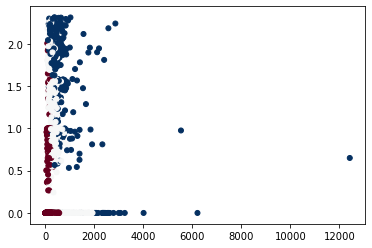

In [8]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 5].values, c=test_label.values, s=25, cmap='RdBu');

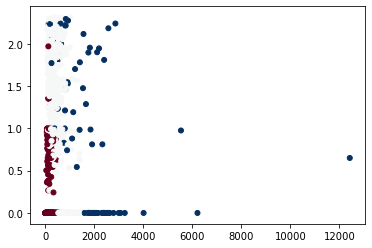

In [9]:
plt.scatter(test_set.iloc[:, 3].values, test_set.iloc[:, 5].values, c=test_pred_gnb, s=25, cmap='RdBu');